<a href="https://colab.research.google.com/github/dhruvi013/Machine-Learning/blob/main/PL_DT%26RD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
spambase = fetch_ucirepo(id=94)

# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

# metadata
print(spambase.metadata)

# variable information
print(spambase.variables)


{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [ ]:
# Check the first few rows of the data
print(X.head())
print(y.head())


   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  word_freq_conference  char_freq_;  \
0             0.00            0.00  ...                   0.0 

In [ ]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Decision Tree Model
print("Training Decision Tree...")
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

Training Decision Tree...


DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict using Decision Tree
y_pred_tree = decision_tree.predict(X_test)

In [ ]:
# Evaluate Decision Tree model
print("\nDecision Tree Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree Evaluation:
Accuracy: 0.9185667752442996

Confusion Matrix:
 [[501  30]
 [ 45 345]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       531
           1       0.92      0.88      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921



In [ ]:
# Random Forest Model
print("\nTraining Random Forest...")
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)


Training Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [ ]:
# Predict using Random Forest
y_pred_forest = random_forest.predict(X_test)

In [ ]:
# Evaluate Random Forest model
print("\nRandom Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))
print("\nClassification Report:\n", classification_report(y_test, y_pred_forest))


Random Forest Evaluation:
Accuracy: 0.9554831704668838

Confusion Matrix:
 [[522   9]
 [ 32 358]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       531
           1       0.98      0.92      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.96      0.96      0.96       921



In [ ]:
# Optional: Plot feature importance from Random Forest
plt.figure(figsize=(10, 6))
features = X.columns
importances = random_forest.feature_importances_
indices = importances.argsort()

<Figure size 1000x600 with 0 Axes>

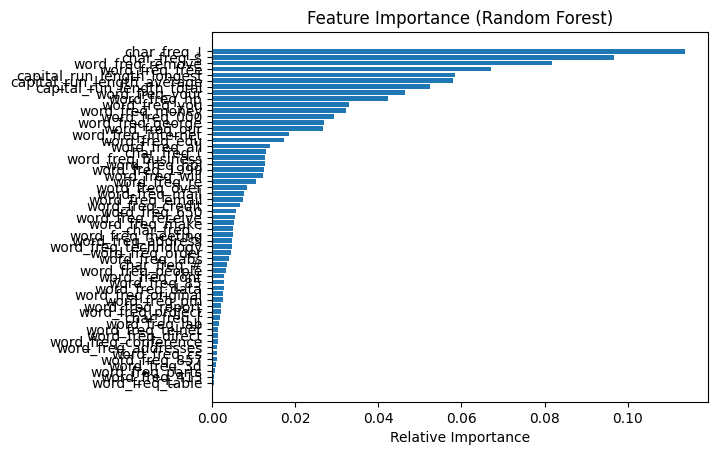

In [ ]:
plt.title('Feature Importance (Random Forest)')
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()